In [28]:
import pandas as pd
import sys
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils.multiclass import unique_labels

In [2]:
df = pd.read_csv('Crimes_-_2001_to_Present.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7842937 entries, 0 to 7842936
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

In [3]:
df.isnull().sum()

ID                           0
Case Number                  4
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description     10730
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614849
Community Area          613476
FBI Code                     0
X Coordinate             88022
Y Coordinate             88022
Year                         0
Updated On                   0
Latitude                 88022
Longitude                88022
Location                 88022
dtype: int64

In [4]:
df = df.dropna()

In [5]:
df.isnull().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

In [6]:
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [7]:
def convt(dt):
    s1 = dt[:11]
    s2 = dt[11:]
    
    month = s1[:2]
    date = s1[3:5]
    year = s1[6:10]
    
    hr = s2[:2]
    mins = s2[3:5]
    sec = s2[6:8]
    time_frame = s2[9:]
    if(time_frame == 'PM'):
        if (int(hr) != 12):
            hr = str(int(hr) + 12)
    else:
        if(int(hr) == 12):
            hr = '00'
    
    final_date = datetime(int(year), int(month), int(date), int(hr), int(mins), int(sec))
    return final_date
    
df['Date'] = df['Date'].apply(convt)
df['Date'].head()

6    2015-09-03 18:00:00
11   2015-09-05 22:42:00
15   2015-09-06 01:10:00
17   2015-09-06 02:00:00
23   2015-09-06 02:35:00
Name: Date, dtype: datetime64[ns]

In [8]:
# Feature Engineering 1 : Month
def month_col(x):
    return int(x.strftime("%m"))
df['Month'] = df['Date'].apply(month_col)

# Feature Engineering 2 : Day
def day_col(x):
    return int(x.strftime("%w"))
df['Day'] = df['Date'].apply(day_col)  

# Feature Engineering 3 : Hour
def hour_col(x):
    return int(x.strftime("%H"))
df['Hour'] = df['Date'].apply(hour_col)

In [9]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Month,Day,Hour
6,10224881,HY411873,2015-09-03 18:00:00,044XX S UNIVERSITY AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,...,1184667.0,1875669.0,2015,02/10/2018 03:50:01 PM,41.813999,-87.598138,"(41.81399924, -87.598137918)",9,4,18
11,10225155,HY412177,2015-09-05 22:42:00,007XX W IRVING PARK RD,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,True,False,...,1170563.0,1926785.0,2015,02/10/2018 03:50:01 PM,41.954584,-87.648376,"(41.954584472, -87.648375776)",9,6,22
15,10225206,HY412253,2015-09-06 01:10:00,047XX S STATE ST,041A,BATTERY,AGGRAVATED: HANDGUN,VACANT LOT/LAND,False,False,...,1177070.0,1873609.0,2015,02/10/2018 03:50:01 PM,41.808521,-87.626066,"(41.80852139, -87.62606631)",9,0,1
17,10225234,HY412306,2015-09-06 02:00:00,002XX N ST LOUIS AVE,0420,BATTERY,AGGRAVATED:KNIFE/CUTTING INSTR,SIDEWALK,False,False,...,1153006.0,1901570.0,2015,02/10/2018 03:50:01 PM,41.885759,-87.713588,"(41.885759278, -87.713588042)",9,0,2
23,10225308,HY412341,2015-09-06 02:35:00,013XX W ADDISON ST,2230,LIQUOR LAW VIOLATION,ILLEGAL CONSUMPTION BY MINOR,SIDEWALK,True,False,...,1166847.0,1924028.0,2015,09/17/2015 11:37:18 AM,41.947100,-87.662116,"(41.947099832, -87.662115668)",9,0,2


In [11]:
top_10 = list(df['Primary Type'].value_counts().head(10).index)
def filter_top_10(df):
    return df[df['Primary Type'].isin(top_10)]

df2 = filter_top_10(df)  # the DataFrame with all data of only the top 10 crimes
df2.shape

(6538850, 25)

In [14]:
df2['Primary Type'].unique()

array(['CRIMINAL DAMAGE', 'BATTERY', 'BURGLARY', 'THEFT', 'OTHER OFFENSE',
       'ROBBERY', 'MOTOR VEHICLE THEFT', 'ASSAULT', 'NARCOTICS',
       'DECEPTIVE PRACTICE'], dtype=object)

In [15]:
crime1 = df2.groupby(['Month','Day','District','Hour'], as_index=False).agg({"Primary Type":"count"})
crime1 = crime1.sort_values(by=['District'], ascending=False)
crime1.head()

,Month,Day,District,Hour,Primary Type
43979,12,5,31.0,21,1
44508,12,6,31.0,11,2
2653,1,4,31.0,22,1
2121,1,3,31.0,13,2
2120,1,3,31.0,10,2


In [16]:
crime=crime1.rename(index=str, columns={"Primary Type":"No_of_crimes"})
crime.head()

,Month,Day,District,Hour,No_of_crimes
43979,12,5,31.0,21,1
44508,12,6,31.0,11,2
2653,1,4,31.0,22,1
2121,1,3,31.0,13,2
2120,1,3,31.0,10,2


In [19]:
print("Highest Crime Count at any district at any time point:", crime["No_of_crimes"].max())
print("Lowest Crime Count at any district at any time point:", crime["No_of_crimes"].min())
print("Average no. of crimes per ditrict per time point :",round(crime['No_of_crimes'].sum()/crime.shape[0], 2))

Highest Crime Count at any district at any time point: 420
Lowest Crime Count at any district at any time point: 1
Average no. of crimes per ditrict per time point : 146.91


In [20]:
lower = np.mean(crime['No_of_crimes'])-0.75*np.std(crime['No_of_crimes'])
higher = np.mean(crime['No_of_crimes'])+0.75*np.std(crime['No_of_crimes'])
print(lower, higher)

92.29142105125096 201.53005325731584


Text(0.5, 1.0, 'Crime Count Distribution')

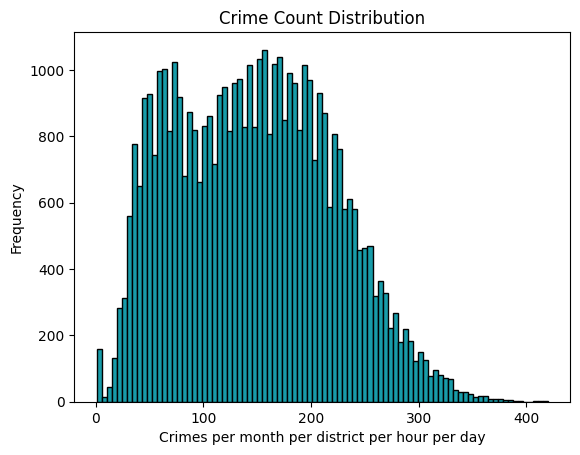

In [22]:
plt.hist(x='No_of_crimes', data=crime,bins=90,linewidth=1,edgecolor='black', color='#189ca9')
plt.xlabel("Crimes per month per district per hour per day")
plt.ylabel("Frequency")
plt.title("Crime Count Distribution")

In [25]:
def crime_rate_assign(x):
    if(x<=92):
        return 0
    elif(x>92 and x<=201):
        return 1
    else:
        return 2
crime['Crime Intensity'] = crime['No_of_crimes'].apply(crime_rate_assign)
crime = crime[['Month','Day','Hour','District','No_of_crimes','Crime Intensity']]    
crime.head()

,Month,Day,Hour,District,No_of_crimes,Crime Intensity
43979,12,5,21,31.0,1,0
44508,12,6,11,31.0,2,0
2653,1,4,22,31.0,1,0
2121,1,3,13,31.0,2,0
2120,1,3,10,31.0,2,0


<Axes: >

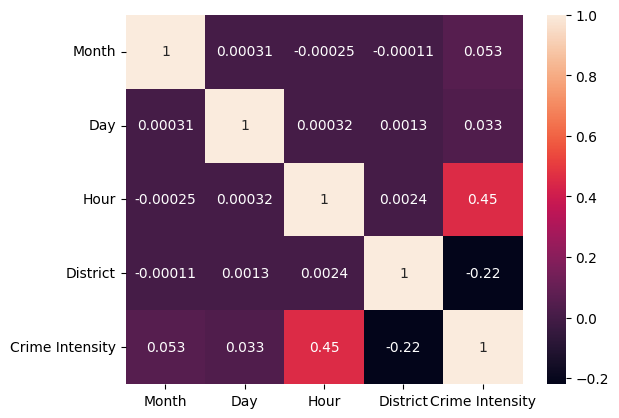

In [26]:
temp = crime[['Month', 'Day', 'Hour', 'District', 'Crime Intensity']]
sns.heatmap(temp.corr(), annot=True)

In [27]:
crime['Crime Intensity'].value_counts()

Crime Intensity
1    21289
0    12291
2    10929
Name: count, dtype: int64

In [32]:
X = crime[['Month', 'Day', 'Hour', 'District']]
y = crime['Crime Intensity'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101) 

d_tree = DecisionTreeClassifier(random_state=101)

d_tree = d_tree.fit(X_train, y_train)

y_pred = d_tree.predict(X_test)

print("Accuracy:",(metrics.accuracy_score(y_test, y_pred)*100),"\n")

cm = pd.crosstab(y_test, y_pred, rownames=['Actual Intensity'], colnames=['Predicted Intensity'])
print("\nConfusion Matrix")
print(cm)

Accuracy: 86.50251617541336 


Confusion Matrix
Predicted Intensity     0     1     2
Actual Intensity                     
0                    2813   293     0
1                     293  4563   457
2                       0   459  2250
